# Information
$Writer:{\;}Junhyuck{\;}Woo
\\ Std. ID: 20145337
\\Project:{\;}Compute{\;}the{\;}average{\;}images{\;}for{\;}each{\;}label{\;}(digit){\;}based{\;}on{\;}L2-norm$


# import library

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Load file

In [2]:
file_data  = "mnist_train.csv"
handle_file= open(file_data, "r")
data         = handle_file.readlines()
handle_file.close()

# Global parameter

In [3]:
size_row = 28    # height of the image
size_col  = 28    # width of the image
num_image = len(data)
count          = 0     # count for the number of images

# Function: normalize the values of the input data to be [0, 1]

In [4]:
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

# Function: L2 Norm
$||x|| = \sqrt{x{^2}{_1} + x{^2}{_2} + {\cdot}{\cdot}{\cdot} + x{^2}{_n}}$

In [5]:
def l2_norm(image):
    average_image = 0
    for pixel in image:
        average_image += pixel * pixel
        
    average_image = np.sqrt(average_image)
        
    return(average_image)

# make a matrix each column of which represents an images in a vector form 

In [6]:
pack_image = [[]*10 for i in range(10)]
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)
for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector    
    pack_image[int(label)].append(im_vector)

    count += 1

# compute average image using L2 Norm

In [7]:
list_result  = np.empty((size_row * size_col, 10), dtype=float)
for i in range(10):
    list_result[:, i] = l2_norm(pack_image[i])

# plot average image

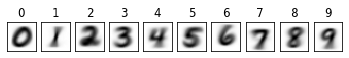

In [9]:
f1 = plt.figure(1)
for i in range(10):

    im_vector   = list_result[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(1, 10, i+1)
    plt.title(i)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()